In [3]:
import pandas as pd
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from skopt.callbacks import DeltaYStopper
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, roc_auc_score, precision_score, recall_score, accuracy_score, \
    f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [4]:
RootDir = '/Users/ggray15/src/python/repos/jhach_cpdsam_symposium_workshop'
os.chdir(RootDir)

In [9]:
%run "./notebooks/function_library.ipynb"

In [6]:
train_impute = pd.read_csv('data/train_smote.csv')
test_impute = pd.read_csv('data/test_impute.csv')

In [7]:
train_features = train_impute.columns[1:]
target_feature = 'readmit_flag'

# Get X/y
X_train = train_impute[train_features]
X_test = test_impute[train_features]
y_train = train_impute[target_feature]
y_test = test_impute[target_feature]

In [11]:
with open('input/rf_params.json','r') as f:
    param_dict = json.load(f)

param_dict = BuildSamplingDict(param_dict)

estimator = RandomForestClassifier()

In [12]:
rf_opt = TuneHyperParameters(
    X_train=X_train, y_train=y_train, estimator=estimator,param_dict=param_dict)

In [13]:
test_score = EvaluateModel(X_test=X_test,y_test=y_test,estimator=rf_opt)
print(test_score)

0.0636042402826855


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8909465020576132
F1 Score: 0.0636042402826855
AUC: 0.5913899793732118
Precision: 0.03982300884955752
Recall: 0.15789473684210525
logloss: 3.930686480706192
PPV: 0.03982300884955752
NPV: 0.9782214156079855
True Negative: 2156
False Positive: 217
False Negative: 48
True Positive: 9


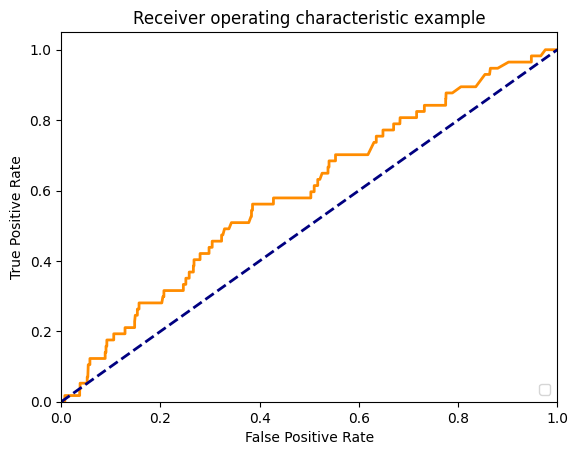

In [14]:
LogMetrics(rf_opt,X_test, y_test)